In [64]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd

In [65]:
import fastai
print("fastai: ",fastai.__version__)
import torch
print("Torch: ",torch.__version__)
import torchvision
print("Torchvision: ",torchvision.__version__)
import sklearn
print("sklearn: ",sklearn.__version__)
import sys
print("Python: ",sys.version)

fastai:  1.0.42
Torch:  1.0.1.post2
Torchvision:  0.2.1
sklearn:  0.20.2
Python:  3.7.2 (default, Dec 29 2018, 06:19:36) 
[GCC 7.3.0]


In [66]:
if torch.cuda.is_available():
    devID=torch.cuda.current_device()
    print("GPU: ",torch.cuda.get_device_name(devID))
else:
    print("Torch Cuda not avaialbe")

GPU:  GeForce GTX 1080 Ti


In [67]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [68]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *

In [69]:
PATH = '../../../../../data/Humpback/'

In [70]:
import os
print(os.listdir(PATH))

['train.zip', 'train', 'test.zip', 'train.csv', 'test', 'models', 'sample_submission.csv']


In [71]:
trainCSV = pd.read_csv(PATH+'train.csv')
trainCSV.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


In [72]:
trainCSV['Id'].value_counts()

new_whale    810
w_1287fbc     34
w_98baff9     27
w_7554f44     26
w_1eafe46     23
w_fd1cb9d     22
w_693c9ee     22
w_ab4cae2     22
w_987a36f     21
w_43be268     21
w_73d5489     21
w_f19faeb     20
w_95874a5     19
w_9b401eb     19
w_b7d5069     18
w_c0d494d     18
w_0e737d0     17
w_18eee6e     17
w_eb0a6ed     17
w_dbda0d6     17
w_17ee910     16
w_6c803bf     16
w_b0e05b1     16
w_67de30b     16
w_a59905f     16
w_cae7677     15
w_9ca943b     15
w_ee17a08     15
w_89e159a     15
w_b074cdf     14
            ... 
w_a30882c      1
w_dd5df89      1
w_452f14f      1
w_f334363      1
w_a29719a      1
w_d521332      1
w_406331a      1
w_bbf6ebf      1
w_e6f2c2d      1
w_03dc41c      1
w_02fce90      1
w_7e9dc07      1
w_2e2ba59      1
w_2ac069f      1
w_0bfb109      1
w_70e49bc      1
w_494dd45      1
w_4fa1bd5      1
w_458f0aa      1
w_4f217e3      1
w_e101deb      1
w_5a6bf1f      1
w_3ed4763      1
w_2d963bb      1
w_397cb24      1
w_a1d95a3      1
w_c0f377b      1
w_bdd0576     

In [73]:
submissionsCSV = pd.read_csv(PATH+'sample_submission.csv')
submissionsCSV.head()

,Image,Id
0,00029b3a.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46
1,0003c693.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46
2,000bc353.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46
3,0010a672.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46
4,00119c3f.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46


In [74]:
fnames = get_image_files(PATH+'train')
fnames[:5]

[PosixPath('../../../../../data/Humpback/train/8de897e9.jpg'),
 PosixPath('../../../../../data/Humpback/train/6a0f071b.jpg'),
 PosixPath('../../../../../data/Humpback/train/20f2aeb0.jpg'),
 PosixPath('../../../../../data/Humpback/train/b83f5353.jpg'),
 PosixPath('../../../../../data/Humpback/train/7e22aca7.jpg')]

In [75]:
# read image size
im=array([list(open_image(image).size) for image in fnames])

In [76]:
type(im), im.shape, im

(numpy.ndarray, (9850, 2), array([[ 452,  992],
        [ 572, 1040],
        [ 700, 1050],
        [ 243, 1050],
        ...,
        [ 600, 1050],
        [ 492,  984],
        [ 238,  923],
        [ 700, 1050]]))

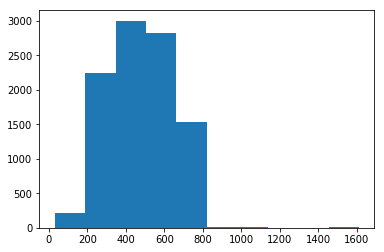

In [77]:
# histogram of x
plt.hist(im[:,0]);

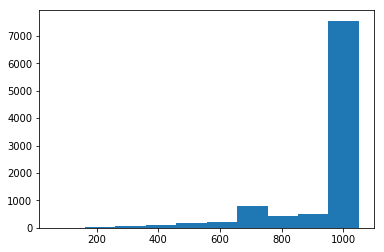

In [78]:
# histogram of y
plt.hist(im[:,1]);

(700, 1050, 3)

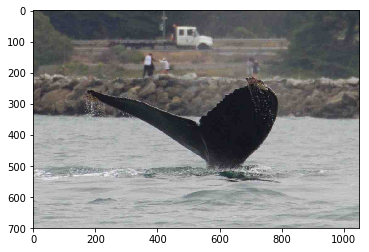

In [79]:
pic=plt.imread(fnames[500])
plt.imshow(pic)
pic.shape

In [80]:
#img = PIL.Image.open(fnames[1]); 
#img

In [81]:
#for file in fnames:
#    if( len(plt.imread(file).shape) < 3 ): # grayscale image
        
#len(fnames)

In [82]:
len(plt.imread(fnames[0]).shape)

2

In [83]:
len(plt.imread(fnames[100]).shape)

3

In [84]:
tfms = get_transforms(do_flip=True, flip_vert=True)

In [85]:
#doc(get_transforms)

In [86]:
#view image augmentations
def get_ex(): return open_image(fnames[100])

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
     rows,cols,figsize=(width,height))[1].flatten())]

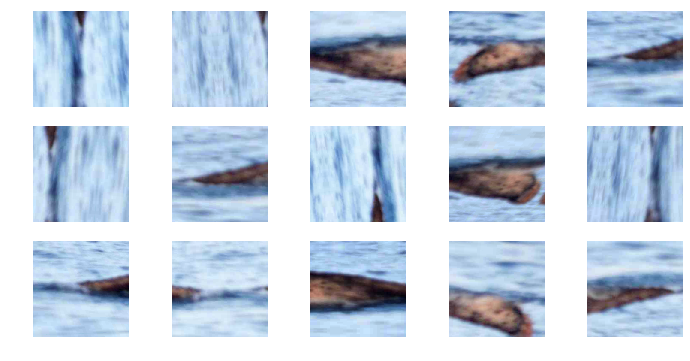

In [87]:
plots_f(3, 5, 12, 6, size=224)

In [88]:
# if size=(224,224) it'll squish (not crop!) it to (224,224)
data = ImageDataBunch.from_csv(PATH, folder='train',test='test',csv_labels='train.csv', ds_tfms=tfms, size=(224,224), bs=16)
data.normalize(imagenet_stats)

/home/norvilr/anaconda3/envs/fastai1.0.42/lib/python3.7/site-packages/fastai/data_block.py:475: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the folowing unknown labels, the corresponding items have been discarded.
w_fa473e6, w_9aeb18f, w_02fce90, w_ea90267, w_88f57d0...
  if getattr(ds, 'warn', False): warn(ds.warn)


ImageDataBunch;

Train: LabelList
y: CategoryList (7880 items)
[Category w_e15442c, Category w_1287fbc, Category w_da2efe0, Category w_19e5482, Category w_f22f3e3]...
Path: ../../../../../data/Humpback
x: ImageItemList (7880 items)
[Image (3, 500, 699), Image (3, 700, 1050), Image (3, 368, 1050), Image (3, 170, 397), Image (3, 398, 700)]...
Path: ../../../../../data/Humpback;

Valid: LabelList
y: CategoryList (1427 items)
[Category w_2216a46, Category w_d5ec83f, Category w_693c9ee, Category w_6fcceaf, Category w_49bbc79]...
Path: ../../../../../data/Humpback
x: ImageItemList (1427 items)
[Image (3, 600, 1050), Image (3, 600, 920), Image (3, 550, 917), Image (3, 600, 1050), Image (3, 315, 1050)]...
Path: ../../../../../data/Humpback;

Test: LabelList
y: EmptyLabelList (15610 items)
[EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel ]...
Path: .
x: ImageItemList (15610 items)
[Image (3, 700, 1050), Image (3, 497, 698), Image (3, 356, 1050), Image (3, 655, 1050), Image (3, 50

In [89]:
data.train_ds

LabelList
y: CategoryList (7880 items)
[Category w_e15442c, Category w_1287fbc, Category w_da2efe0, Category w_19e5482, Category w_f22f3e3]...
Path: ../../../../../data/Humpback
x: ImageItemList (7880 items)
[Image (3, 500, 699), Image (3, 700, 1050), Image (3, 368, 1050), Image (3, 170, 397), Image (3, 398, 700)]...
Path: ../../../../../data/Humpback

In [90]:
data.test_ds

LabelList
y: EmptyLabelList (15610 items)
[EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel ]...
Path: .
x: ImageItemList (15610 items)
[Image (3, 700, 1050), Image (3, 497, 698), Image (3, 356, 1050), Image (3, 655, 1050), Image (3, 500, 699)]...
Path: ../../../../../data/Humpback

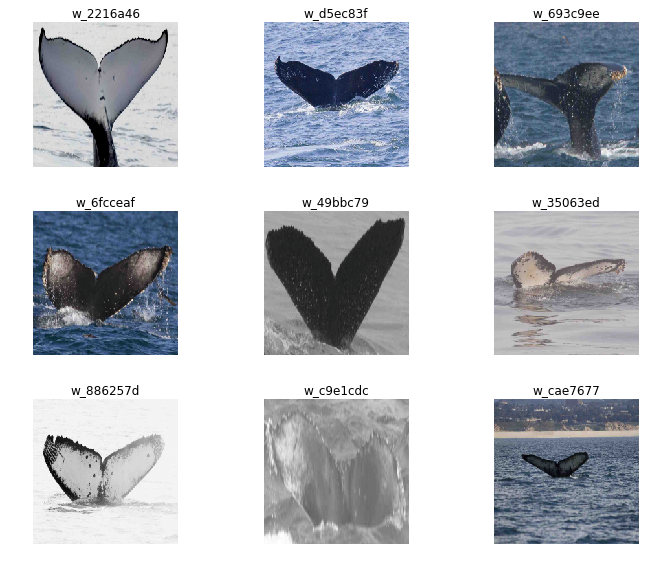

In [91]:
data.show_batch(rows=3, figsize=(10,8), ds_type=DatasetType.Valid)

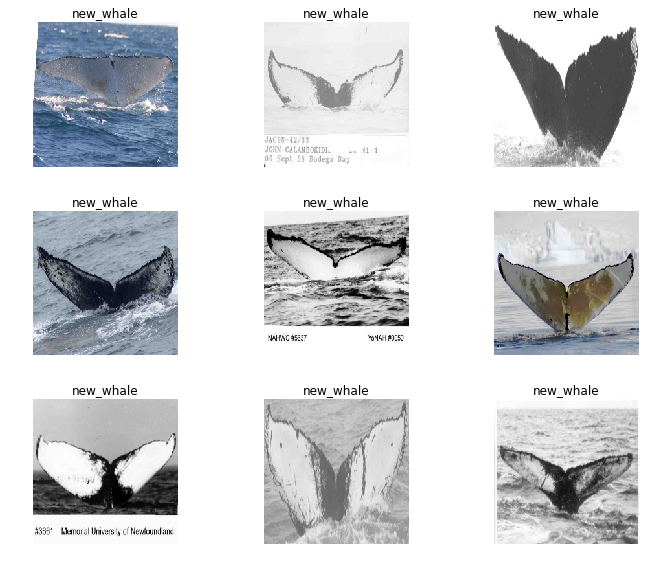

In [92]:
data.show_batch(rows=3, figsize=(10,8), ds_type=DatasetType.Test)

In [93]:
#print(data.classes)
len(data.classes)

3762

In [94]:
learn = create_cnn(data, models.resnet101, metrics=error_rate)

In [95]:
learn.fit_one_cycle(5)
# 1 	8.288634 	7.621109 	0.947690
# 2 	7.915483 	7.200187 	0.900136
# 3 	7.470490 	7.020962 	0.896739
# 4 	7.020436 	6.816136 	0.876359
# 5 	6.508235 	6.799308 	0.879755

epoch,train_loss,valid_loss,error_rate
1,8.230334,7.387908,0.902593
2,7.856821,7.066748,0.899089
3,7.498770,6.777193,0.877365
4,6.904277,6.593141,0.861247
5,6.413423,6.557023,0.861247


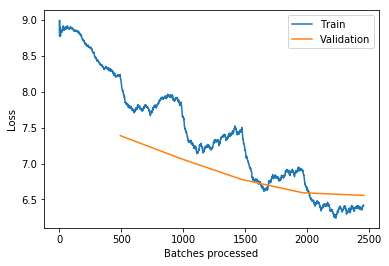

In [96]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


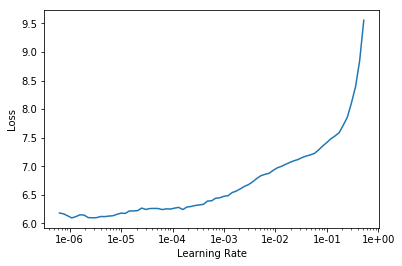

In [97]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [98]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-5))
# epoch 	train_loss 	valid_loss 	error_rate
# 1 	6.574177 	6.804043 	0.874321
# 2 	6.538513 	6.758852 	0.881114
# 3 	6.445692 	6.708827 	0.875000
# 4 	6.263362 	6.656760 	0.872962
# 5 	6.204262 	6.645457 	0.870924

epoch,train_loss,valid_loss,error_rate
1,6.329906,6.550843,0.860547
2,6.310400,6.517121,0.859145
3,6.276712,6.495937,0.858444
4,6.221932,6.489137,0.854940
5,6.163940,6.493513,0.859846


In [99]:
learn.save('224_all')

In [100]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

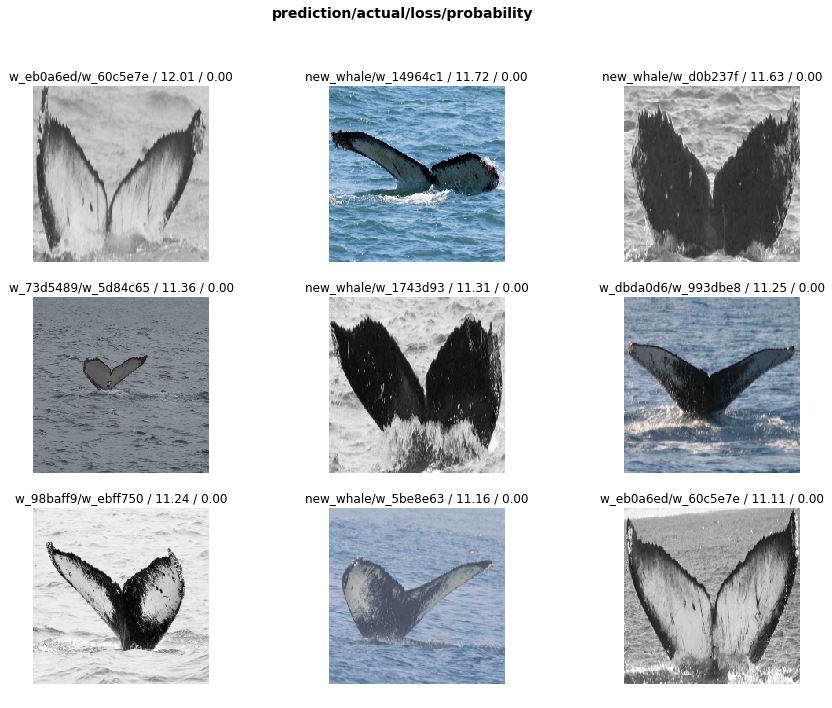

In [101]:
interp.plot_top_losses(9, figsize=(15,11))

In [102]:
#interp.most_confused(min_val=2)

In [103]:
# Increase image size to 299
size = (299,299)

In [104]:
data = ImageDataBunch.from_csv(PATH, folder='train',test='test',csv_labels='train.csv', ds_tfms=tfms, size=size, bs=8)
data.normalize(imagenet_stats)

/home/norvilr/anaconda3/envs/fastai1.0.42/lib/python3.7/site-packages/fastai/data_block.py:475: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the folowing unknown labels, the corresponding items have been discarded.
w_790c2aa, w_4a074b8, w_b38374a, w_c9abb54, w_4cedbf8...
  if getattr(ds, 'warn', False): warn(ds.warn)


ImageDataBunch;

Train: LabelList
y: CategoryList (7880 items)
[Category w_e15442c, Category w_1287fbc, Category w_da2efe0, Category w_19e5482, Category w_8b1ca89]...
Path: ../../../../../data/Humpback
x: ImageItemList (7880 items)
[Image (3, 500, 699), Image (3, 700, 1050), Image (3, 368, 1050), Image (3, 170, 397), Image (3, 652, 1000)]...
Path: ../../../../../data/Humpback;

Valid: LabelList
y: CategoryList (1410 items)
[Category w_d02787f, Category w_0e737d0, Category w_67fecca, Category w_cce912e, Category w_0b04c08]...
Path: ../../../../../data/Humpback
x: ImageItemList (1410 items)
[Image (3, 525, 1050), Image (3, 600, 1050), Image (3, 335, 1050), Image (3, 441, 1050), Image (3, 700, 1050)]...
Path: ../../../../../data/Humpback;

Test: LabelList
y: EmptyLabelList (15610 items)
[EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel ]...
Path: .
x: ImageItemList (15610 items)
[Image (3, 700, 1050), Image (3, 497, 698), Image (3, 356, 1050), Image (3, 655, 1050), Image (3,

In [105]:
learn.load('224_all')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (7880 items)
[Category w_e15442c, Category w_1287fbc, Category w_da2efe0, Category w_19e5482, Category w_f22f3e3]...
Path: ../../../../../data/Humpback
x: ImageItemList (7880 items)
[Image (3, 500, 699), Image (3, 700, 1050), Image (3, 368, 1050), Image (3, 170, 397), Image (3, 398, 700)]...
Path: ../../../../../data/Humpback;

Valid: LabelList
y: CategoryList (1427 items)
[Category w_2216a46, Category w_d5ec83f, Category w_693c9ee, Category w_6fcceaf, Category w_49bbc79]...
Path: ../../../../../data/Humpback
x: ImageItemList (1427 items)
[Image (3, 600, 1050), Image (3, 600, 920), Image (3, 550, 917), Image (3, 600, 1050), Image (3, 315, 1050)]...
Path: ../../../../../data/Humpback;

Test: LabelList
y: EmptyLabelList (15610 items)
[EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel , EmptyLabel ]...
Path: .
x: ImageItemList (15610 items)
[Image (3, 700, 1050), Image (3, 497, 698), Image (3, 356, 1050), Image (3, 655, 1050),

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


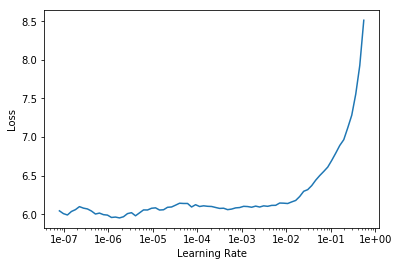

In [106]:
learn.freeze()
learn.lr_find(start_lr=1e-8)
learn.recorder.plot()

In [107]:
learn.fit_one_cycle(5, max_lr=1e-3)

epoch,train_loss,valid_loss,error_rate
1,6.698128,6.604774,0.859846
2,6.820204,6.557131,0.849334
3,6.625840,6.341742,0.843027
4,6.144392,6.208404,0.834618
5,5.875849,6.171798,0.836020


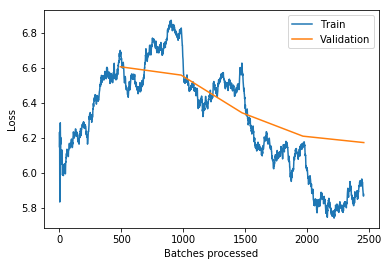

In [108]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


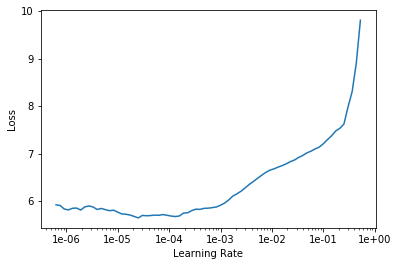

In [109]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [110]:
learn.fit_one_cycle(6, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate
1,5.746635,6.169612,0.832516
2,5.767353,6.167299,0.829012
3,5.794052,6.160781,0.834618
4,5.721243,6.143463,0.829713
5,5.742294,6.144918,0.831114
6,5.764733,6.131978,0.827610


In [112]:
# Get Predictions
predictions,y = learn.get_preds(ds_type=DatasetType.Test)


In [113]:
df2 = pd.DataFrame(predictions.numpy())
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,3752,3753,3754,3755,3756,3757,3758,3759,3760,3761
0,0.036107,0.000193,0.000103,0.000262,0.000140,0.000830,0.000153,0.000146,0.000191,0.000101,...,0.000158,0.000564,0.000136,0.000205,0.000432,0.000219,0.000094,0.000084,0.000420,0.000085
1,0.012810,0.000083,0.000102,0.000265,0.000137,0.000126,0.000518,0.000076,0.000155,0.000134,...,0.000369,0.000215,0.000128,0.000679,0.000892,0.000368,0.000122,0.000148,0.000669,0.000057
2,0.012937,0.000069,0.000083,0.001137,0.000122,0.000167,0.000593,0.000161,0.000125,0.000132,...,0.003115,0.000237,0.000107,0.000253,0.000471,0.000203,0.000065,0.000261,0.000108,0.000163
3,0.217352,0.000011,0.000009,0.000178,0.000020,0.000018,0.000018,0.000006,0.000006,0.000007,...,0.000098,0.000394,0.000011,0.000084,0.012265,0.000110,0.000008,0.000006,0.000010,0.000005
4,0.000035,0.000092,0.000435,0.000526,0.000360,0.000179,0.000318,0.000184,0.000487,0.000139,...,0.000142,0.000102,0.000207,0.000110,0.000169,0.000139,0.000221,0.000098,0.000466,0.000251


In [114]:
len(data.classes)

3751

In [ ]:
#add class labels to data frame
df2.columns = data.classes
df2.head()

In [116]:
np.argmax(predictions.numpy(), axis=1)

array([  0,   0,   0,   0, ...,   0, 170,   0,   0])

In [ ]:
## Diferent Metrics

In [ ]:
learn2 = create_cnn(data, models.resnet101, metrics=top_k_accuracy)

In [ ]:
#doc(create_cnn)

In [ ]:
learn2.fit_one_cycle(5)